In [6]:
from elections.Ballot import Ballot
from elections.DefaultConfigOptions import *
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h
from elections.NDPopulation import NDPopulation
from network.ElectionModel import ElectionModel
from Experiment import Experiment, ExperimentalConfig
import matplotlib.pyplot as plt
from typing import List, Tuple


In [7]:
def run_random_election(exp: Experiment) -> Tuple[Candidate, List[Candidate]]:
    candidates = exp.config.gen_candidates_2(5)
    # candidates = exp.config.gen_random_candidates(5)
    voters = exp.config.population.generate_unit_voters(exp.config.sampling_voters)
    ballots = [Ballot(v, candidates, unit_election_config) for v in voters]
    process = exp.config.election_constructor
    result = process.run(ballots, set(candidates))
    winner = result.winner()
    return winner, candidates

In [8]:
def results_for_candidate(results: List[Tuple[Candidate, List[Candidate]]], candidate_name: str, wins_only: bool):
    ideologies = []
    for w, cc in results:
        if wins_only and w.name == candidate_name:
            ideologies.append(w.ideology.vec[0])
        elif not wins_only:
            for c in cc:
                if c.name == candidate_name:
                    ideologies.append( c.ideology.vec[0] )

    print(f"found {len(ideologies)} results")
    return ideologies

In [9]:
def make_random_plot(exp: Experiment, title: str, path: str):
    winners = []
    for i in range(100):
        w, cc = run_random_election(exp)
        winners.append((w, cc))
        if i % 100 == 0:
            print(f"{i:5d} w.ideology: {w.ideology.vec[0]:.4}")

    #names = ["L", "C", "R", "c-0", "c-1"]
    names = ["c-0", "c-1", "c-2", "c-3", "c-4"]
    results = [results_for_candidate(winners, n, True) for n in names]
    exp.plot_results(results, title, names)
    plt.savefig(path)

    0 w.ideology: 1.023
found 26 results
found 19 results
found 14 results
found 16 results
found 25 results
    0 w.ideology: 0.6667
found 22 results
found 25 results
found 16 results
found 21 results
found 16 results
    0 w.ideology: 0.02082
found 17 results
found 15 results
found 20 results
found 24 results
found 24 results


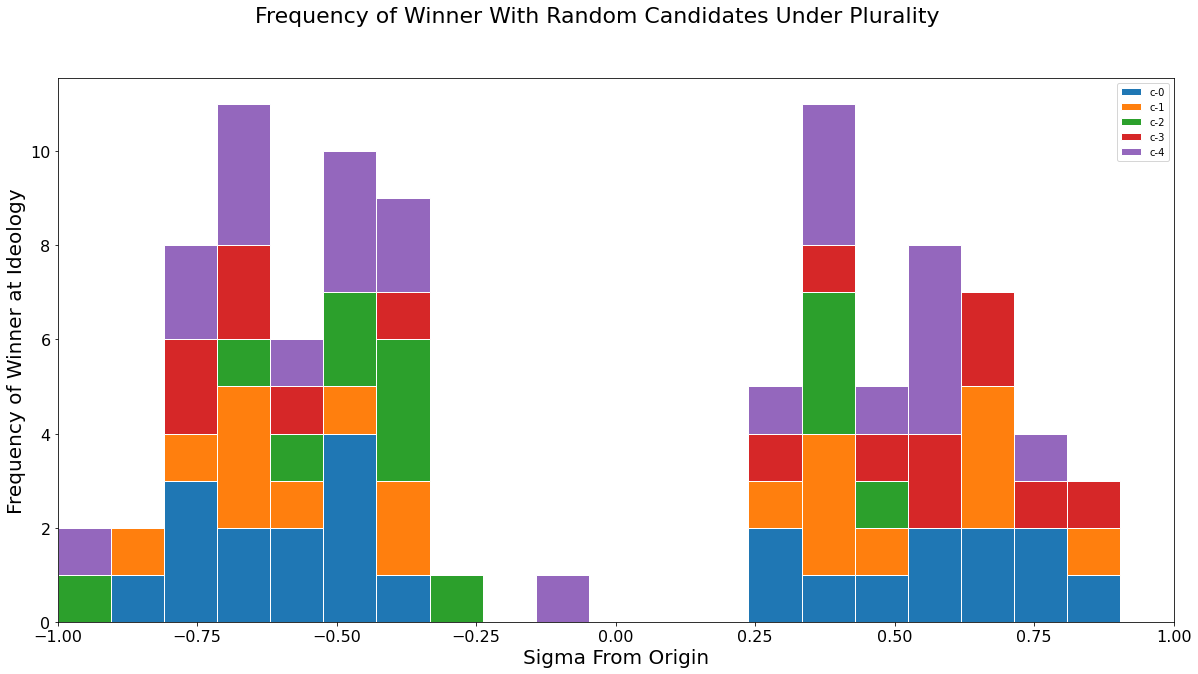

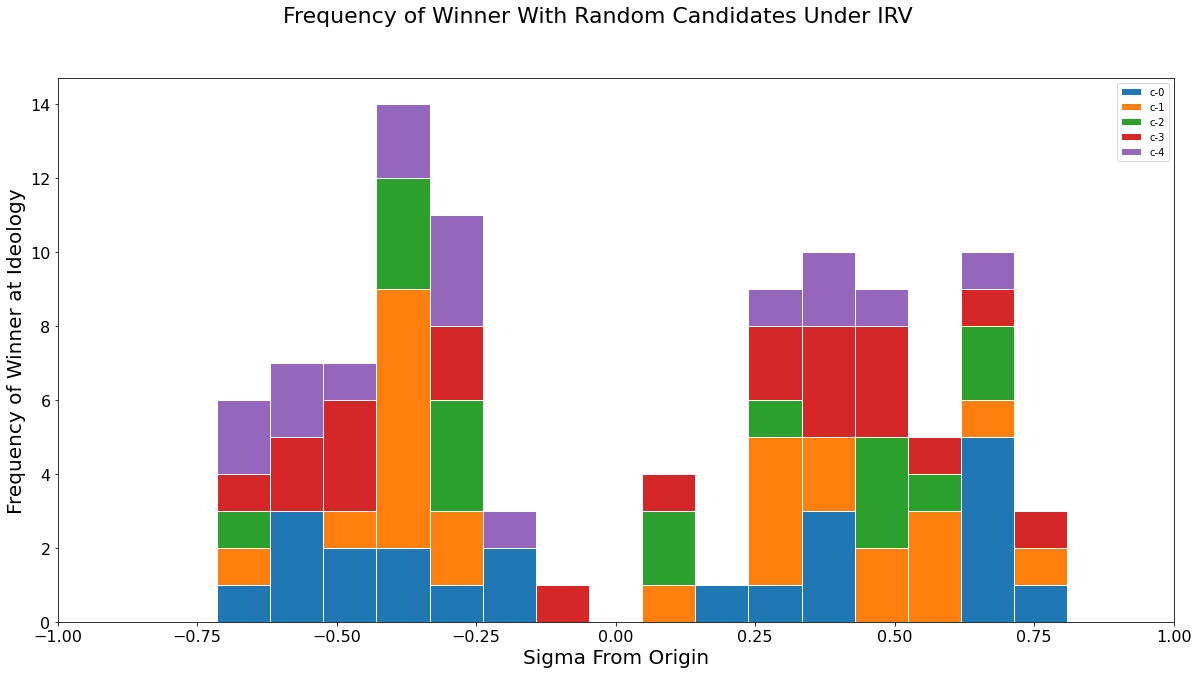

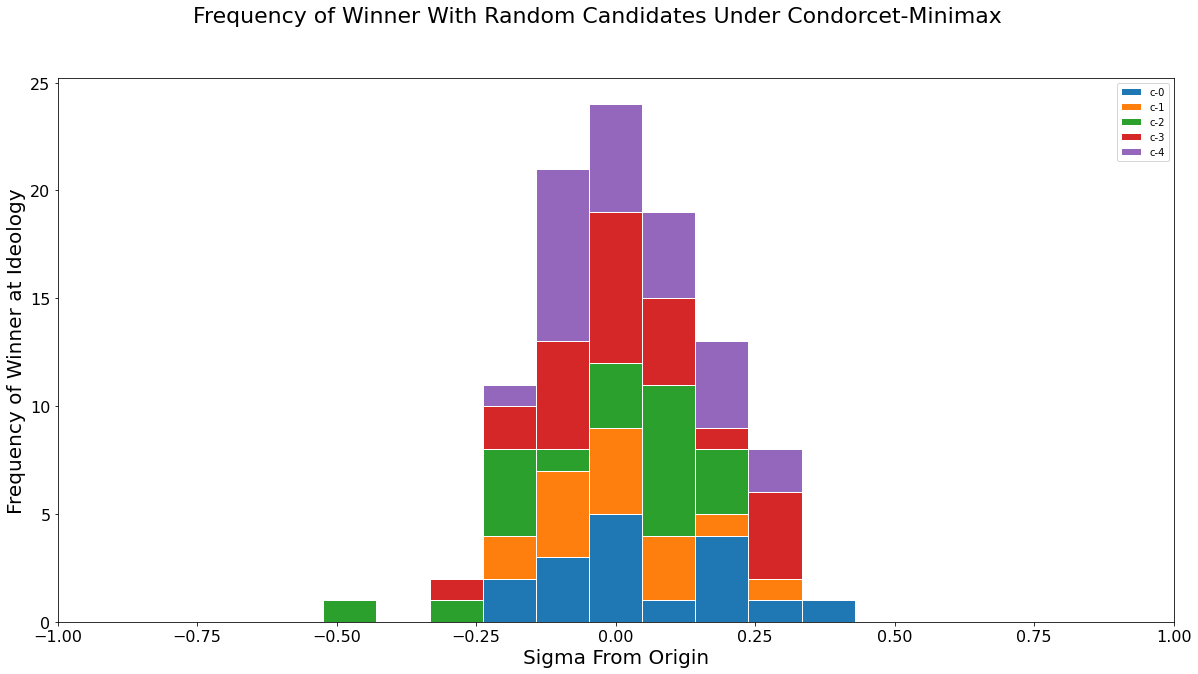

In [11]:
make_random_plot(Experiment(ExperimentalConfig("Plurality")),
                 "Frequency of Winner With Random Candidates Under Plurality",
                 "random_pty_r2.png")

make_random_plot(Experiment(ExperimentalConfig("IRV")),
                 "Frequency of Winner With Random Candidates Under IRV",
                 "random_irv_r2.png")

make_random_plot(Experiment(ExperimentalConfig("H2H")),
                 "Frequency of Winner With Random Candidates Under Condorcet-Minimax",
                 "random_h2h_r2.png")
